# DATA EXPLORATION AND VISUALIZATION
A more in depth look at how the NeedleDrop data is correlated with Spotify's data about each album

In [1]:
#obligatory set up code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#bring data from data_acquisition to this notebook
nd_data = pd.read_csv('needledrop_data.csv')

### Data overview

In [3]:
nd_data.describe()

,score,year,track count,duration,# artists mean,danceability mean,energy mean,speechiness mean,acousticness mean,instrumentalness mean,...,start_of_fade_out 50%,loudness 50%,tempo 50%,tempo_confidence 50%,time_signature 50%,time_signature_confidence 50%,key 50%,key_confidence 50%,mode 50%,mode_confidence 50%
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,...,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,6.421233,2013.517694,12.048516,2902.494076,1.199533,0.492897,0.656509,0.115328,0.237872,0.255865,...,244.010687,-7.649613,119.016442,0.359525,3.978596,0.916995,5.253139,0.468967,0.729452,0.483130
std,1.648621,5.610499,4.507680,1118.364351,0.456323,0.157426,0.170257,0.091404,0.209671,0.283237,...,128.080081,2.997944,16.456891,0.199418,0.151043,0.130053,2.053953,0.117232,0.422632,0.085926
min,0.000000,1965.000000,1.000000,34.920270,1.000000,0.099967,0.020050,0.027800,0.000001,0.000000,...,34.920270,-28.022500,71.015500,0.009000,1.000000,0.093000,0.000000,0.000000,0.000000,0.120000
25%,5.000000,2012.000000,10.000000,2319.306620,1.000000,0.382405,0.550096,0.048453,0.081360,0.010788,...,192.532070,-9.030000,108.454625,0.203000,4.000000,0.893750,4.000000,0.398000,0.500000,0.425875
50%,7.000000,2014.000000,11.000000,2729.057690,1.000000,0.500955,0.669664,0.075541,0.185181,0.138639,...,221.945010,-7.203000,119.969500,0.327250,4.000000,0.972000,5.000000,0.466750,1.000000,0.479750
75%,8.000000,2016.000000,14.000000,3346.279997,1.166667,0.608023,0.776268,0.155404,0.343247,0.446547,...,258.869114,-5.621625,129.972000,0.482000,4.000000,0.999000,7.000000,0.536125,1.000000,0.532125
max,10.000000,2020.000000,50.000000,12023.493360,5.444444,0.899250,0.996625,0.592000,0.978000,0.963700,...,2468.792000,0.942000,182.860000,1.000000,4.500000,1.000000,11.000000,1.000000,1.000000,1.000000


### Distributions

Here we can look at how the various columns in out data are distributed. We are not yet making correlations between the columns, rather just seeing how the features are distributed across all of the albums. Note that our data contains **mean**, **std**, and **50%** for each spotify feature/analysis column. The mean and 50% (median) can both be used as a measure of center about a feature in an album while the std can be used as a measure of spread.

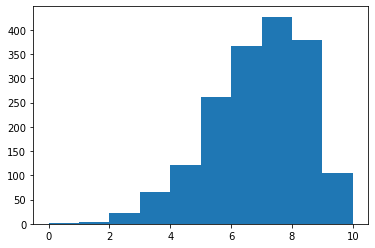

In [4]:
plt.hist(nd_data['score'],10)
plt.show()

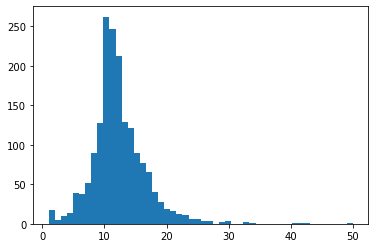

In [5]:
#distribution of # of tracks per album
plt.hist(nd_data['track count'],50)
plt.show()

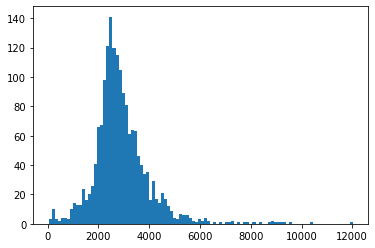

In [6]:
#distribution of duration of albums (seconds)
plt.hist(nd_data['duration'],100)
plt.show()

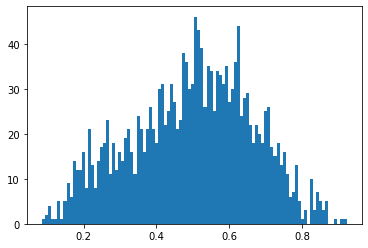

In [7]:
#median dancability of albums
plt.hist(nd_data['danceability 50%'],100)
plt.show()

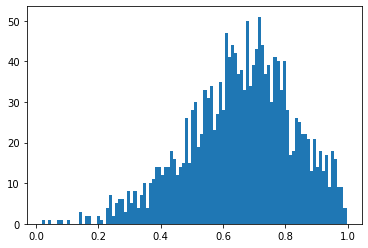

In [8]:
#distribution of the mean energy of albums
plt.hist(nd_data['energy mean'],100)
plt.show()

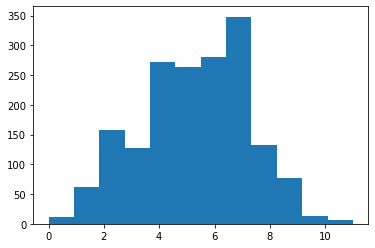

In [9]:
plt.hist(nd_data['key 50%'],12)
plt.show()

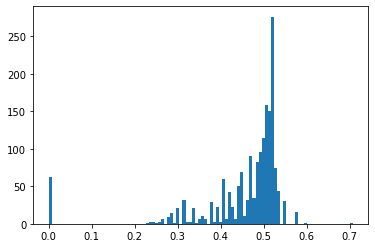

In [11]:
plt.hist(nd_data['mode std'],100)
plt.show()

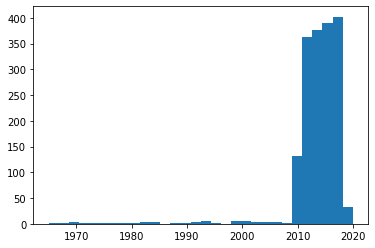

In [12]:
#distribution of reviewed album years
plt.hist(nd_data['year'],30)
plt.show()

### Correlations

At this point, we'll make scatter plots to give us some clues as to how the different columns might relate

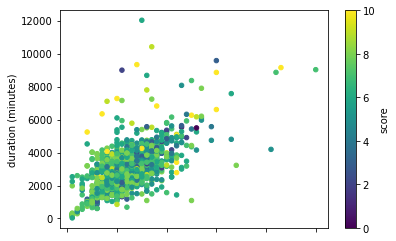

In [39]:
#A silly example
nd_data.plot(kind = 'scatter', x='track count', y='duration', c = 'score', colormap = 'viridis')
plt.xlabel('track count (song #)'); plt.ylabel('duration (minutes)');
plt.show()

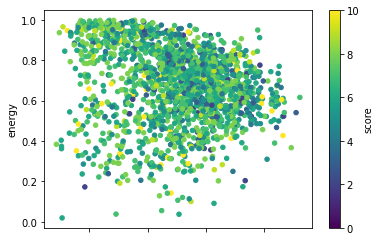

In [38]:
#danceability vs energy
nd_data.plot(kind='scatter', x='danceability 50%', y='energy 50%', c='score', colormap = 'viridis')
plt.xlabel('dancability'); plt.ylabel('energy');
plt.show()

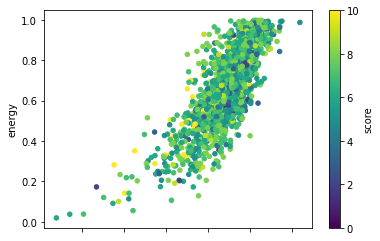

In [37]:
#loudness vs energy
nd_data.plot(kind='scatter', x='loudness 50%', y='energy 50%', c='score', colormap='viridis')
plt.xlabel('loudness'); plt.ylabel('energy');
plt.show()

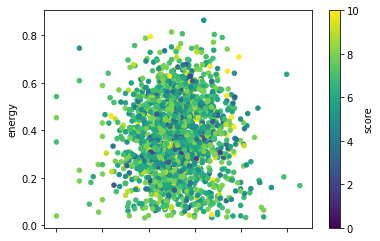

In [41]:
nd_data.plot(kind='scatter', x='key mean', y='valence mean', c='score', colormap='autumn')
plt.xlabel('loudness'); plt.ylabel('energy');
plt.show()

In [46]:
nd_headers = list(nd_data.columns.values)

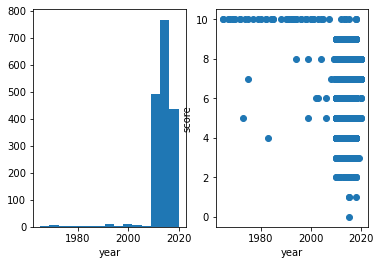

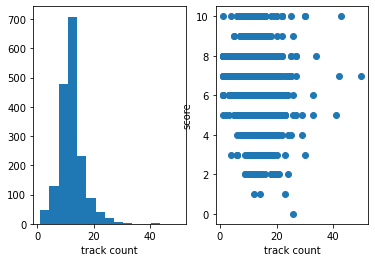

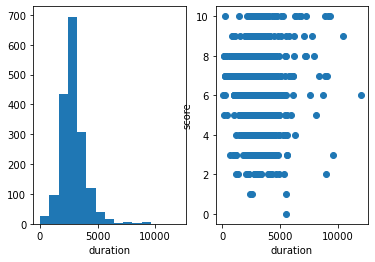

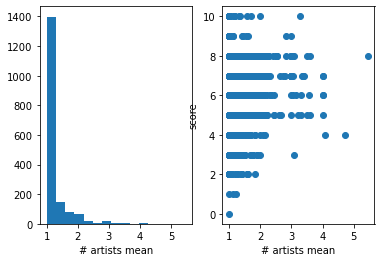

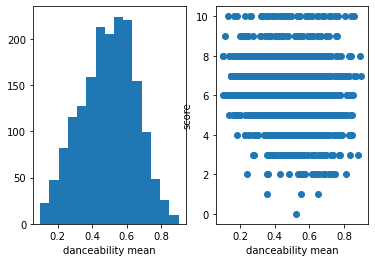

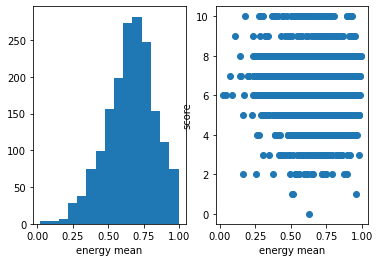

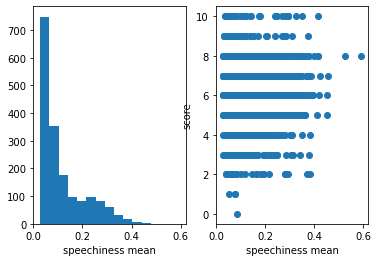

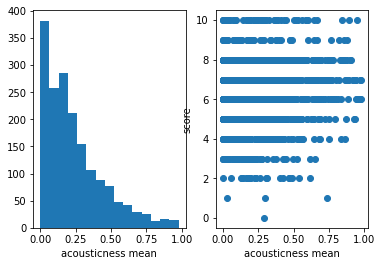

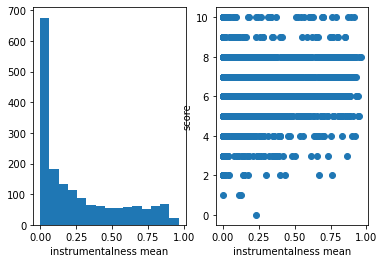

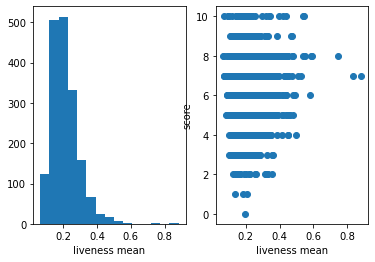

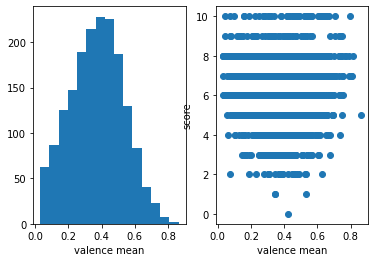

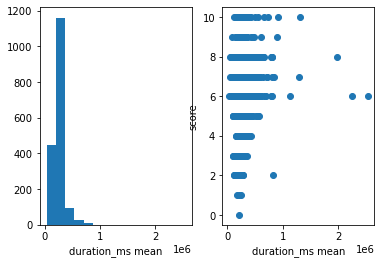

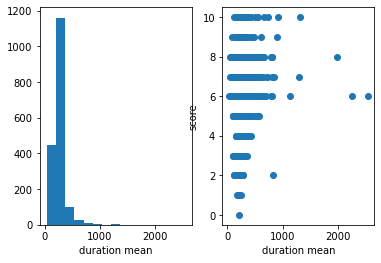

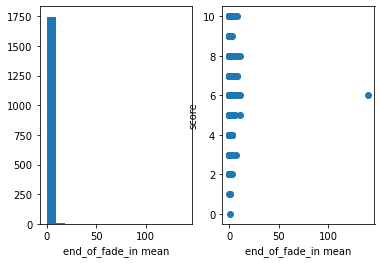

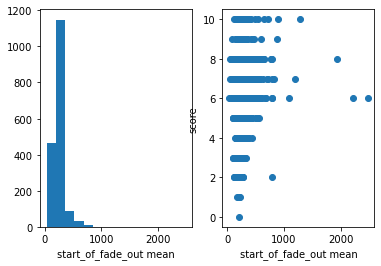

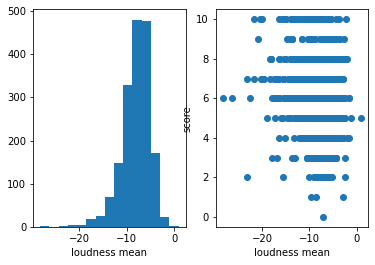

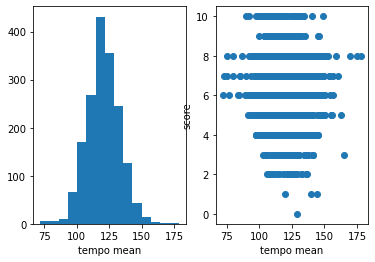

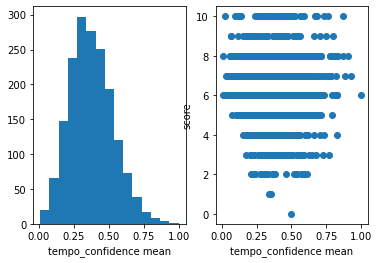

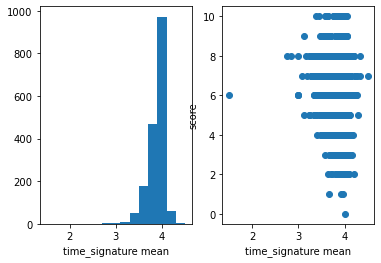

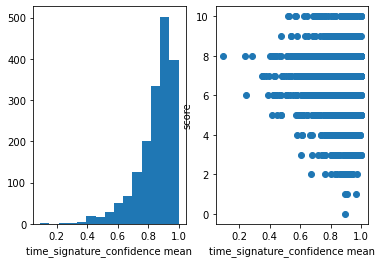

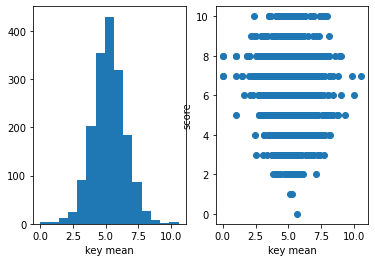

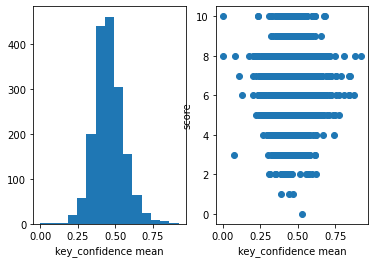

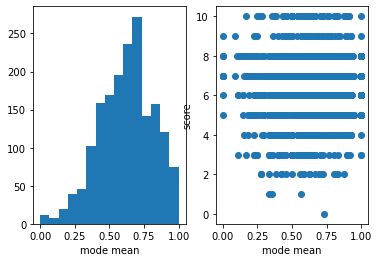

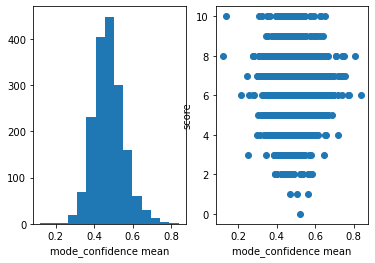

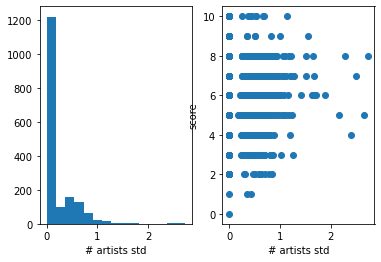

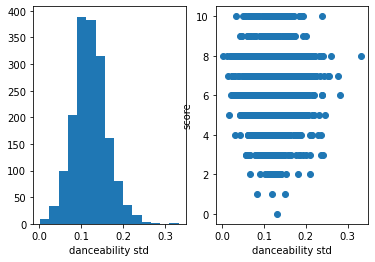

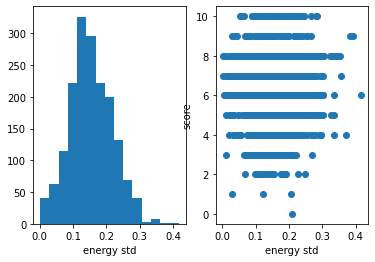

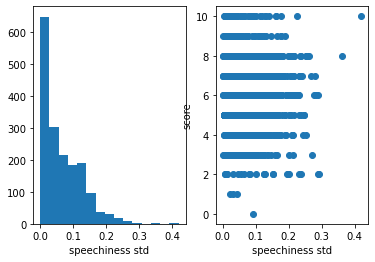

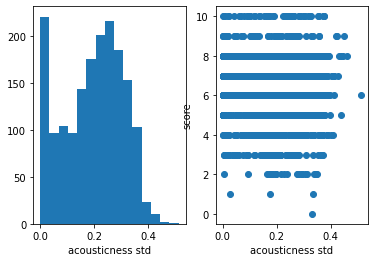

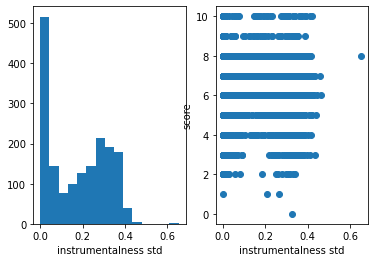

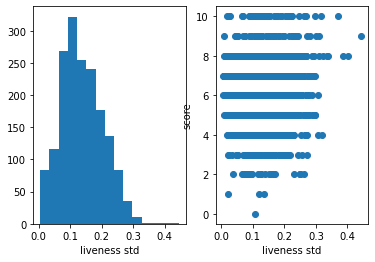

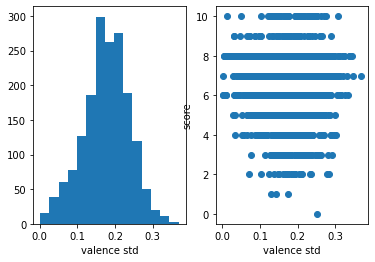

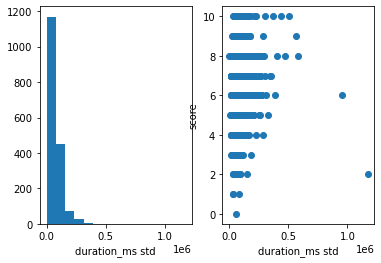

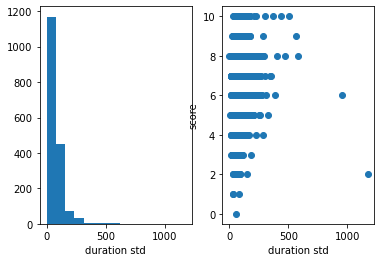

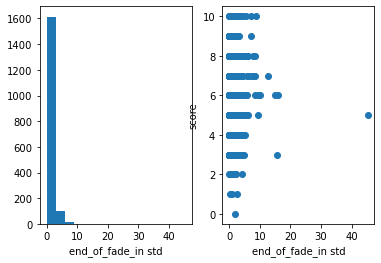

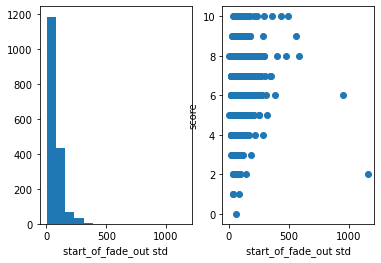

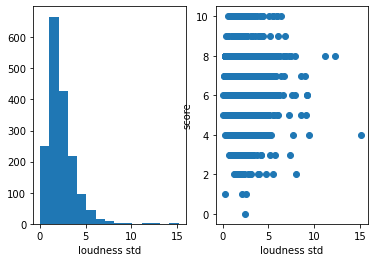

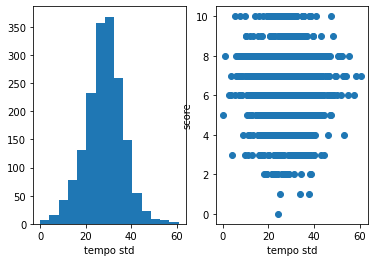

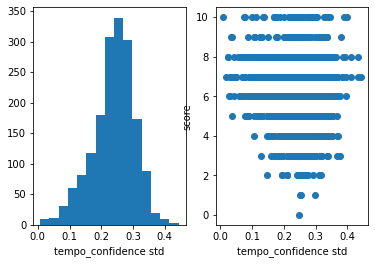

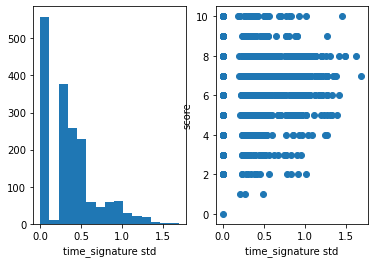

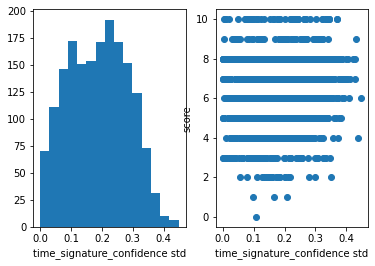

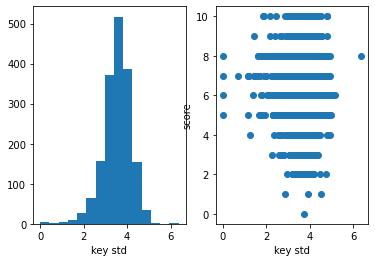

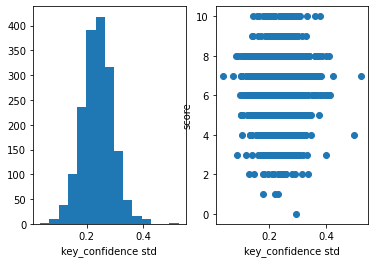

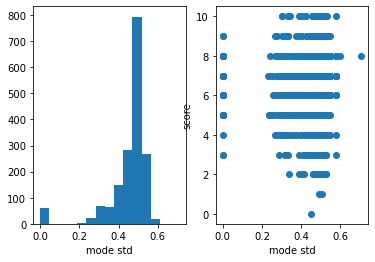

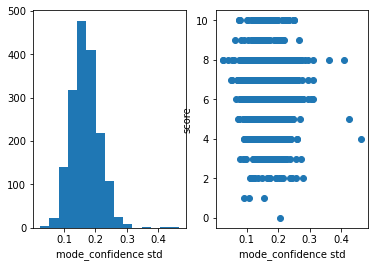

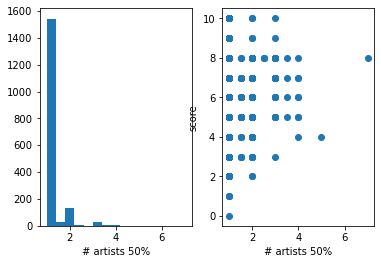

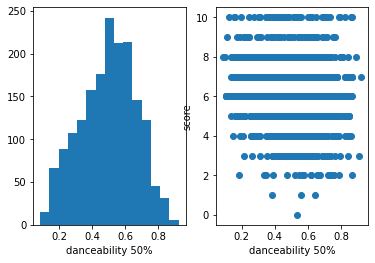

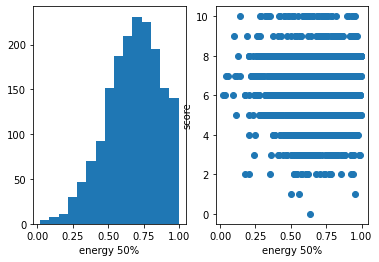

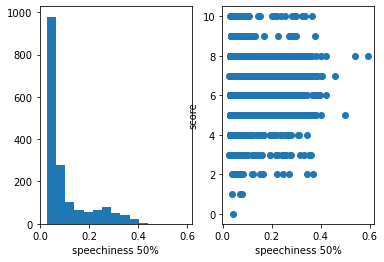

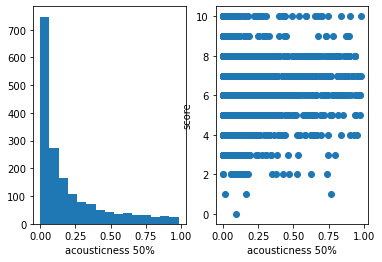

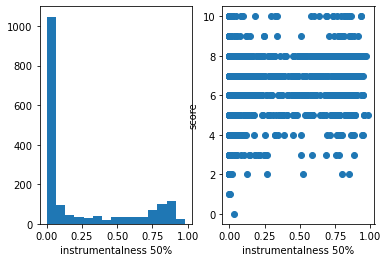

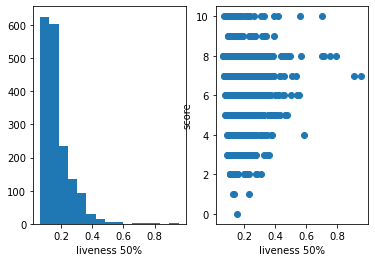

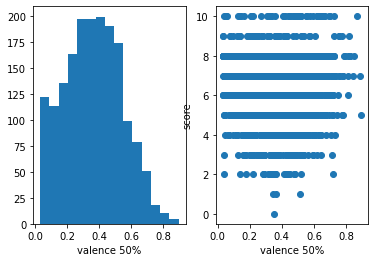

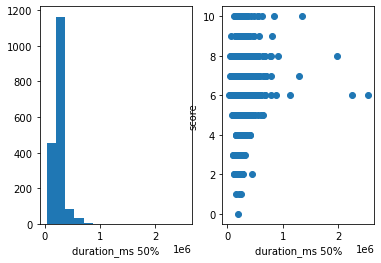

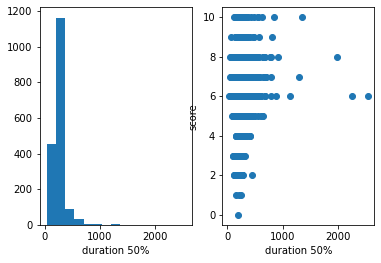

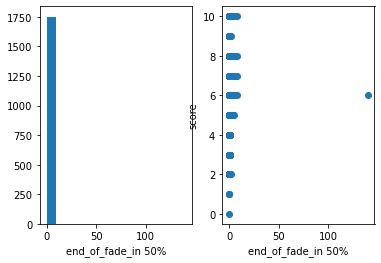

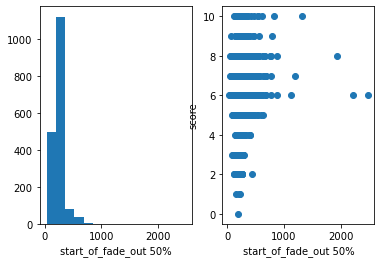

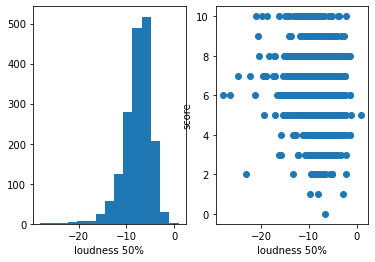

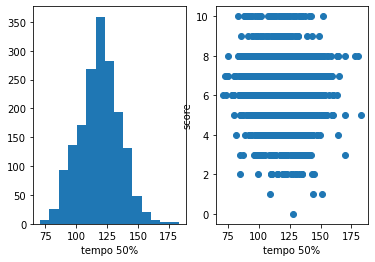

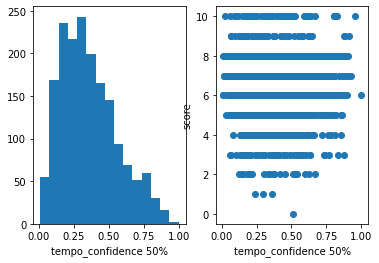

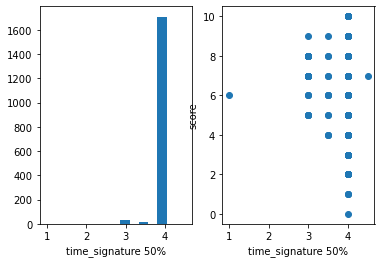

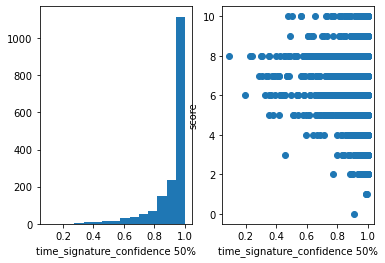

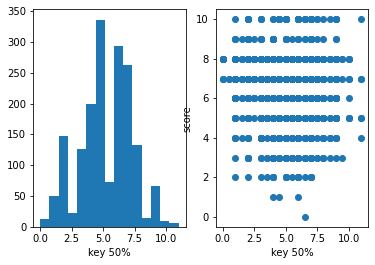

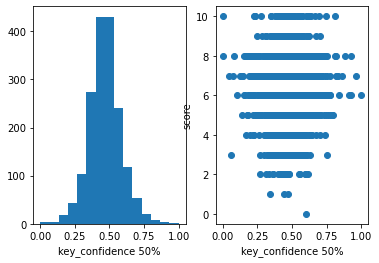

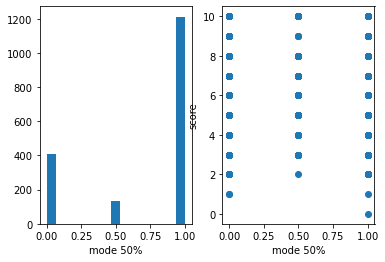

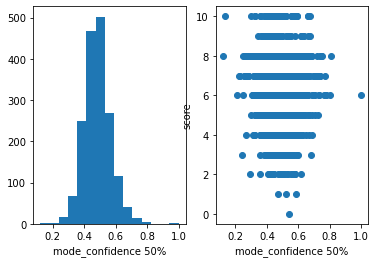

In [54]:
for f in nd_headers[4:]:
    plt.subplot(1,2,1)
    plt.hist(nd_data[f],15)
    plt.xlabel(f)
    plt.subplot(1,2,2)
    plt.scatter(nd_data[f], nd_data['score'])
    plt.xlabel(f)
    plt.ylabel('score')
    plt.show()